In [1]:
import numpy as np

# The Normal Equation

In [2]:
np.random.seed(42)
m=100
X = 2 * np.random.rand(m,1)
y = 4+ 3*X+np.random.randn(m,1)

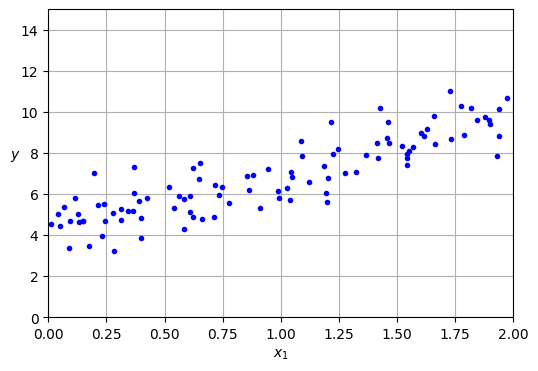

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(X,y,'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.savefig("generated_data_plot")
plt.show()

In [4]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @y

In [5]:
theta_best


array([[4.21509616],
       [2.77011339]])

In [6]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

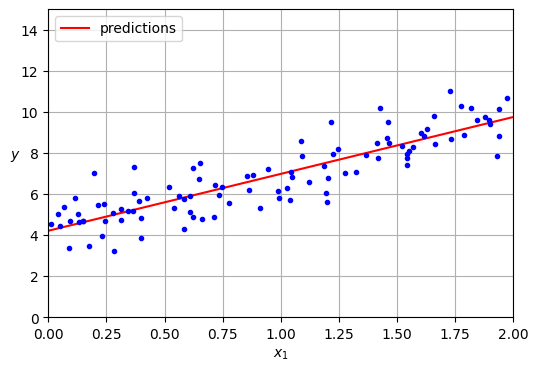

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize =(6,4))
plt.plot(X_new,y_predict,"r-",label="predictions")
plt.plot(X,y,"b.")

plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.legend(loc="upper left")
plt.savefig("linear_model_predictions_plot")

plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [10]:
theta_best_svd,residuals,rank,s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [11]:
np.linalg.pinv(X_b) @y

array([[4.21509616],
       [2.77011339]])

# Gradient Descent

## Batch Gradient Descent

In [12]:
eta = 0.1 
n_iterations = 1000
m = 100 

theta = np.random.rand(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [13]:
theta 

array([[4.21509616],
       [2.77011339]])

## Stochastic Gradient Descent

In [22]:
theta_path_sgd = []

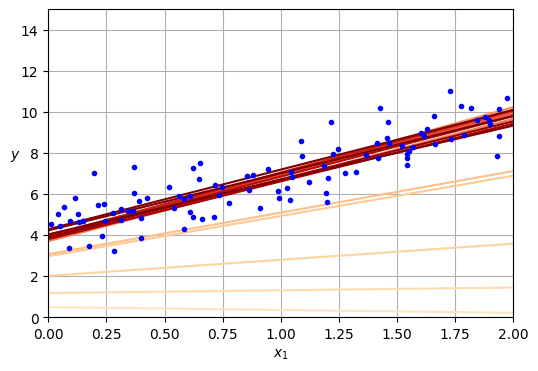

In [27]:

import matplotlib as mpl

n_epochs = 50
t0,t1 = 5,50

def learning_schedule(t):
    return t0/(t+t1)

np.random.seed(42)
theta =np.random.randn(2,1)

n_shown = 20
plt.figure(figsize = (6,4))


for epoch in range(n_epochs):
    for iteration in range(m):
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta 
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index +1]
        yi = y[random_index : random_index +1]
        gradients = 2*xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation =0)
plt.axis([0,2,0,15])
plt.grid()
plt.savefig("sgd_plot")
plt.show()

In [28]:
theta

array([[4.21076011],
       [2.74856079]])

In [29]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000,tol = 1e-3,penalty=None,eta0 =0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [30]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.19984658]), array([2.73198364]))

## Mini Batch Gradient Descent